In [0]:
import os
!rm -rf *
!rm -rf .kaggle/
!git clone https://github.com/bkahn-github/data-science-bowl.git
!pip install -r data-science-bowl/requirements.txt
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip3 install Pillow
!mkdir ~/.kaggle
f = open(".kaggle/kaggle.json", "w")
f.write('{"username":"bkkaggle","key":"bf4e62680116284087ace0484990f87a"}')
f.close()
!kaggle competitions download -c data-science-bowl-2018
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_train.zip -d ~/.kaggle/competitions/data-science-bowl-2018/train
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_test.zip -d ~/.kaggle/competitions/data-science-bowl-2018/test
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_train_labels.csv.zip -d ~/.kaggle/competitions/data-science-bowl-2018/labels
os.chdir('data-science-bowl')
!git checkout keras-unet-augmented
os.chdir('kerasUnetAugmented/')

In [0]:
os.chdir('../../')
!rm -rf data-science-bowl/
!git clone https://github.com/bkahn-github/data-science-bowl.git
os.chdir('data-science-bowl/kerasUnet')

In [2]:
import os
import sys
import random
import warnings

import PIL
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator

import skimage
from skimage.transform import resize

import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

from load_data import load_data, load_test_data, load_test_image_sizes
from metrics import dice_loss, iou, iou_metric
from model import model
from process_data import encode, upsample
from submit import submit

%matplotlib inline

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed(seed=seed)

Using TensorFlow backend.


In [3]:
x_train, y_train, x_val, y_val, train_datagen = load_data(train_val_split=0.1, batch_size=4)
x_test = load_test_data()
x_test_sizes = load_test_image_sizes()

100%|██████████| 65/65 [00:00<00:00, 143.75it/s]


In [4]:
unet = model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
unet.fit_generator(train_datagen, steps_per_epoch=len(x_train)/4, validation_data=(x_val, y_val), epochs=50)

Epoch 1/50
151/150 [==============================] - 18s 122ms/step - loss: 0.3240 - keras_iou: 0.4423 - val_loss: 0.1814 - val_keras_iou: 0.4725
Epoch 2/50
151/150 [==============================] - 15s 100ms/step - loss: 0.1450 - keras_iou: 0.5527 - val_loss: 0.1255 - val_keras_iou: 0.6089
Epoch 3/50
120/150 [======================>.......] - ETA: 2s - loss: 0.1232 - keras_iou: 0.6366

151/150 [==============================] - 15s 99ms/step - loss: 0.1175 - keras_iou: 0.6419 - val_loss: 0.1054 - val_keras_iou: 0.6699
Epoch 4/50
151/150 [==============================] - 15s 97ms/step - loss: 0.1120 - keras_iou: 0.6892 - val_loss: 0.1118 - val_keras_iou: 0.7034
Epoch 5/50
151/150 [==============================] - 15s 98ms/step - loss: 0.1067 - keras_iou: 0.7137 - val_loss: 0.0935 - val_keras_iou: 0.7241
Epoch 6/50
  8/150 [>.............................] - ETA: 13s - loss: 0.1011 - keras_iou: 0.7253

151/150 [==============================] - 15s 97ms/step - loss: 0.1048 - keras_iou: 0.7320 - val_loss: 0.1068 - val_keras_iou: 0.7386
Epoch 7/50
151/150 [==============================] - 15s 98ms/step - loss: 0.1023 - keras_iou: 0.7439 - val_loss: 0.0911 - val_keras_iou: 0.7494
Epoch 8/50
137/150 [==========================>...] - ETA: 1s - loss: 0.0973 - keras_iou: 0.7539

151/150 [==============================] - 15s 98ms/step - loss: 0.0993 - keras_iou: 0.7543 - val_loss: 0.0887 - val_keras_iou: 0.7587
Epoch 9/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0983 - keras_iou: 0.7623 - val_loss: 0.1016 - val_keras_iou: 0.7660
Epoch 10/50
151/150 [==============================] - 15s 99ms/step - loss: 0.0964 - keras_iou: 0.7689 - val_loss: 0.0847 - val_keras_iou: 0.7717
Epoch 11/50
  9/150 [>.............................] - ETA: 13s - loss: 0.1112 - keras_iou: 0.7721

151/150 [==============================] - 15s 98ms/step - loss: 0.0964 - keras_iou: 0.7743 - val_loss: 0.1006 - val_keras_iou: 0.7768
Epoch 12/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0955 - keras_iou: 0.7791 - val_loss: 0.0883 - val_keras_iou: 0.7810
Epoch 13/50
135/150 [=========================>....] - ETA: 1s - loss: 0.0933 - keras_iou: 0.7826

151/150 [==============================] - 15s 98ms/step - loss: 0.0938 - keras_iou: 0.7828 - val_loss: 0.0848 - val_keras_iou: 0.7849
Epoch 14/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0925 - keras_iou: 0.7869 - val_loss: 0.0809 - val_keras_iou: 0.7885
Epoch 15/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0908 - keras_iou: 0.7901 - val_loss: 0.0856 - val_keras_iou: 0.7915
Epoch 16/50
  7/150 [>.............................] - ETA: 13s - loss: 0.0764 - keras_iou: 0.7917

151/150 [==============================] - 15s 97ms/step - loss: 0.0900 - keras_iou: 0.7930 - val_loss: 0.0848 - val_keras_iou: 0.7944
Epoch 17/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0890 - keras_iou: 0.7957 - val_loss: 0.0786 - val_keras_iou: 0.7970
Epoch 18/50
135/150 [=========================>....] - ETA: 1s - loss: 0.0903 - keras_iou: 0.7981

151/150 [==============================] - 15s 97ms/step - loss: 0.0913 - keras_iou: 0.7982 - val_loss: 0.0790 - val_keras_iou: 0.7993
Epoch 19/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0878 - keras_iou: 0.8005 - val_loss: 0.0789 - val_keras_iou: 0.8015
Epoch 20/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0905 - keras_iou: 0.8024 - val_loss: 0.0782 - val_keras_iou: 0.8033
Epoch 21/50
  9/150 [>.............................] - ETA: 13s - loss: 0.1117 - keras_iou: 0.8033

151/150 [==============================] - 15s 98ms/step - loss: 0.0880 - keras_iou: 0.8042 - val_loss: 0.0780 - val_keras_iou: 0.8051
Epoch 22/50
151/150 [==============================] - 15s 99ms/step - loss: 0.0862 - keras_iou: 0.8060 - val_loss: 0.0787 - val_keras_iou: 0.8069
Epoch 23/50
135/150 [=========================>....] - ETA: 1s - loss: 0.0864 - keras_iou: 0.8074

151/150 [==============================] - 15s 98ms/step - loss: 0.0860 - keras_iou: 0.8075 - val_loss: 0.0771 - val_keras_iou: 0.8084
Epoch 24/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0859 - keras_iou: 0.8091 - val_loss: 0.0793 - val_keras_iou: 0.8099
Epoch 25/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0859 - keras_iou: 0.8105 - val_loss: 0.0821 - val_keras_iou: 0.8113
Epoch 26/50
 11/150 [=>............................] - ETA: 13s - loss: 0.0806 - keras_iou: 0.8113

151/150 [==============================] - 15s 98ms/step - loss: 0.0850 - keras_iou: 0.8119 - val_loss: 0.0791 - val_keras_iou: 0.8126
Epoch 27/50
151/150 [==============================] - 15s 100ms/step - loss: 0.0851 - keras_iou: 0.8131 - val_loss: 0.0778 - val_keras_iou: 0.8137
Epoch 28/50
133/150 [=========================>....] - ETA: 1s - loss: 0.0892 - keras_iou: 0.8142

151/150 [==============================] - 15s 100ms/step - loss: 0.0888 - keras_iou: 0.8142 - val_loss: 0.0815 - val_keras_iou: 0.8146
Epoch 29/50
151/150 [==============================] - 15s 100ms/step - loss: 0.0870 - keras_iou: 0.8150 - val_loss: 0.0770 - val_keras_iou: 0.8154
Epoch 30/50
151/150 [==============================] - 15s 99ms/step - loss: 0.0863 - keras_iou: 0.8158 - val_loss: 0.0777 - val_keras_iou: 0.8163
Epoch 31/50
  7/150 [>.............................] - ETA: 13s - loss: 0.0776 - keras_iou: 0.8164

151/150 [==============================] - 15s 98ms/step - loss: 0.0882 - keras_iou: 0.8167 - val_loss: 0.0779 - val_keras_iou: 0.8172
Epoch 32/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0853 - keras_iou: 0.8175 - val_loss: 0.0774 - val_keras_iou: 0.8180
Epoch 33/50
135/150 [=========================>....] - ETA: 1s - loss: 0.0844 - keras_iou: 0.8184

151/150 [==============================] - 15s 97ms/step - loss: 0.0830 - keras_iou: 0.8184 - val_loss: 0.0796 - val_keras_iou: 0.8189
Epoch 34/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0857 - keras_iou: 0.8192 - val_loss: 0.0801 - val_keras_iou: 0.8195
Epoch 35/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0840 - keras_iou: 0.8199 - val_loss: 0.0762 - val_keras_iou: 0.8203
Epoch 36/50
  9/150 [>.............................] - ETA: 13s - loss: 0.1127 - keras_iou: 0.8203

151/150 [==============================] - 15s 98ms/step - loss: 0.0855 - keras_iou: 0.8205 - val_loss: 0.0756 - val_keras_iou: 0.8209
Epoch 37/50
151/150 [==============================] - 15s 97ms/step - loss: 0.0838 - keras_iou: 0.8212 - val_loss: 0.0772 - val_keras_iou: 0.8216
Epoch 38/50
136/150 [==========================>...] - ETA: 1s - loss: 0.0820 - keras_iou: 0.8219

151/150 [==============================] - 15s 97ms/step - loss: 0.0825 - keras_iou: 0.8219 - val_loss: 0.0747 - val_keras_iou: 0.8223
Epoch 39/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0819 - keras_iou: 0.8227 - val_loss: 0.0797 - val_keras_iou: 0.8229
Epoch 40/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0818 - keras_iou: 0.8232 - val_loss: 0.0739 - val_keras_iou: 0.8236
Epoch 41/50
 10/150 [>.............................] - ETA: 13s - loss: 0.0699 - keras_iou: 0.8236

151/150 [==============================] - 15s 99ms/step - loss: 0.0830 - keras_iou: 0.8239 - val_loss: 0.0809 - val_keras_iou: 0.8242
Epoch 42/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0821 - keras_iou: 0.8244 - val_loss: 0.0792 - val_keras_iou: 0.8247
Epoch 43/50
132/150 [=========================>....] - ETA: 1s - loss: 0.0815 - keras_iou: 0.8249

151/150 [==============================] - 15s 98ms/step - loss: 0.0826 - keras_iou: 0.8250 - val_loss: 0.0729 - val_keras_iou: 0.8253
Epoch 44/50
151/150 [==============================] - 15s 99ms/step - loss: 0.0820 - keras_iou: 0.8255 - val_loss: 0.0758 - val_keras_iou: 0.8258
Epoch 45/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0830 - keras_iou: 0.8260 - val_loss: 0.0815 - val_keras_iou: 0.8263
Epoch 46/50
  9/150 [>.............................] - ETA: 13s - loss: 0.1026 - keras_iou: 0.8262

151/150 [==============================] - 15s 98ms/step - loss: 0.0821 - keras_iou: 0.8265 - val_loss: 0.0790 - val_keras_iou: 0.8267
Epoch 47/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0821 - keras_iou: 0.8270 - val_loss: 0.0756 - val_keras_iou: 0.8272
Epoch 48/50
134/150 [=========================>....] - ETA: 1s - loss: 0.0806 - keras_iou: 0.8274

151/150 [==============================] - 15s 97ms/step - loss: 0.0806 - keras_iou: 0.8274 - val_loss: 0.0773 - val_keras_iou: 0.8277
Epoch 49/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0816 - keras_iou: 0.8279 - val_loss: 0.0766 - val_keras_iou: 0.8281
Epoch 50/50
151/150 [==============================] - 15s 98ms/step - loss: 0.0803 - keras_iou: 0.8284 - val_loss: 0.0749 - val_keras_iou: 0.8286


In [6]:
iou_metric(x_train, y_train, x_val, y_val, unet)

(0.5668482335160966, 0.5608368991271886)

In [0]:
preds = unet.predict(x_test)

In [0]:
test_path = '../../.kaggle/competitions/data-science-bowl-2018/test/'
test_ids = next(os.walk(test_path))[1]

preds_upsampled = upsample(preds)

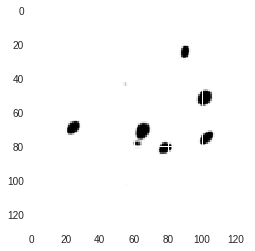

In [9]:
plt.imshow(preds[2].reshape(128, 128))

In [0]:
rles, new_test_ids = encode(preds_upsampled, test_ids)

In [0]:
submit(new_test_ids, rles)

In [0]:
pd.read_csv('./submission.csv')

In [0]:
from google.colab import files

files.download('submission.csv')